# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
print(penguins.head())
penguins_dummies = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)
print(penguins_dummies.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0            39.1           18.7              181.0       3750.0  2007   
1            39.5           17.4              186.0       3800.0  2007   
2            40.3           18.0              195.0       3250.0  2007   
3             NaN            NaN                NaN          NaN  2007   

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

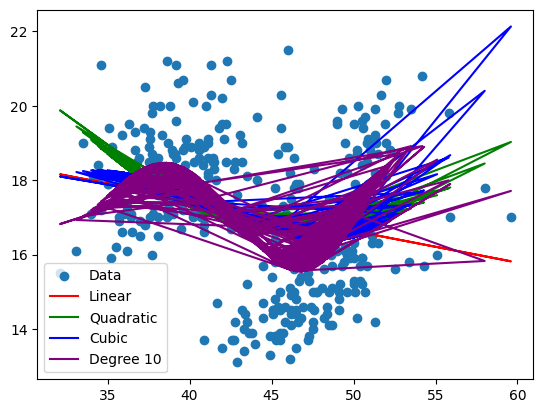

In [ ]:
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

# Create polynomial features
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)

poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)

poly10 = PolynomialFeatures(degree=10)
X_poly10 = poly10.fit_transform(X)

# Fit the models
model_linear = LinearRegression().fit(X, y)
model_poly2 = LinearRegression().fit(X_poly2, y)
model_poly3 = LinearRegression().fit(X_poly3, y)
model_poly10 = LinearRegression().fit(X_poly10, y)

# Make predictions
y_pred_linear = model_linear.predict(X)
y_pred_poly2 = model_poly2.predict(X_poly2)
y_pred_poly3 = model_poly3.predict(X_poly3)
y_pred_poly10 = model_poly10.predict(X_poly10)

plt.scatter(X, y, label='Data')
plt.plot(X, y_pred_linear, label='Linear', color='red')
plt.plot(X, y_pred_poly2, label='Quadratic', color='green')
plt.plot(X, y_pred_poly3, label='Cubic', color='blue')
plt.plot(X, y_pred_poly10, label='Degree 10', color='purple')
plt.legend()
plt.show() #

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Degree 10 is very noisy so it is most likely overfitting the data, while the linear model underfits the data by being too linear. Quadratic and cubic seem to fit along the data the best and suits the model.